### Import 

In [42]:
# !pip install googlemaps

import pandas as pd
import scipy.stats as stats
import numpy as np
import os,re 
import folium
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (13, 8)
import warnings
warnings.filterwarnings("ignore")

### Read Data 

`-` 업로드된 데이터 확인 

In [43]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

`-` read data 

In [44]:
# congestion=pd.read_csv('/kaggle/input/statjbnu1/data1.csv')
congestion=pd.read_csv('data1.csv')
congestion.head()

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,15.1,15.9,17.1,16.0,19.0,15.2,10.5,7.8,6.0,0.9
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,...,36.5,31.2,37.6,44.6,45.6,37.8,28.8,19.3,7.1,0.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,...,18.7,18.3,20.7,22.0,24.0,18.7,13.7,10.0,6.9,1.0
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,...,32.0,27.7,34.8,39.3,37.4,36.3,23.0,18.1,4.0,1.6
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,...,25.8,24.2,30.0,31.9,34.0,26.8,18.8,12.5,9.1,1.2


In [45]:
airCondition = pd.read_csv('data2.csv')
airCondition.head() # 공기질 점수를 만들기 가중합 이용해

,호선,역사명,미세먼지(PM10),이산화탄소(CO2),포름알데히드(HCHO),일산화탄소(CO)
0,1,서울역1,76.4,627,16.4,0.6
1,1,시청1,100.7,610,17.8,1.0
2,1,종각,99.8,687,20.5,0.9
3,1,종로3가1,105.3,646,20.6,1.3
4,1,종로5가,99.4,532,16.4,1.1


In [46]:
station = pd.read_csv('data3.csv')
station.head()

,연번,자치구,해당역(호선),역개수
0,1,강남구,삼성(2) 선릉(2) 역삼(2) 강남(2) 압구정(3) 신사(3) 매봉(3) 도곡(...,21
1,2,강동구,천호(5) 강동(5) 길동(5) 굽은다리(5) 명일(5) 고덕(5) 상일동(5) 둔...,14
2,3,강북구,수유(4) 미아(4) 미아사거리(4),3
3,4,강서구,방화(5) 개화산(5) 김포공항(5) 송정(5) 마곡(5) 발산(5) 우장산(5) ...,9
4,5,관악구,낙성대(2) 서울대입구(2) 봉천(2) 신림(2),4


In [47]:
passengers = pd.read_csv('passengers2020.csv', header = 0, encoding = 'utf-8')
passengers.head()

,연번,호선,역번호,역명,2020년1월,2020년2월,2020년3월,2020년4월,2020년5월,2020년6월,2020년7월,2020년8월,2020년9월,2020년10월,2020년11월,2020년12월
0,1,1,150,서울역(1),3198290.0,2271168.0,1601396.0,1803550.0,2112629.0,2201148.0,2391615.0,1986290.0,1705059.0,2121997.0,2218093.0,1648262.0
1,2,1,151,시청(1),1477362.0,1149641.0,888317.0,874072.0,962697.0,1042088.0,1134098.0,922958.0,853911.0,994423.0,1072922.0,857434.0
2,3,1,152,종각,2462560.0,1945843.0,1475933.0,1586710.0,1745454.0,1892509.0,2069902.0,1626359.0,1378130.0,1702997.0,1758055.0,1314449.0
3,4,1,153,종로3가(1),1935106.0,1421415.0,1095035.0,1224282.0,1374997.0,1360814.0,1523797.0,1212158.0,1051916.0,1298918.0,1297683.0,953894.0
4,5,1,154,종로5가,1527217.0,1149021.0,947157.0,1040487.0,1182917.0,1182427.0,1263489.0,1017196.0,988661.0,1124400.0,1100466.0,930913.0


### Preprocessing

#### congestion


In [48]:
congestion.head() #따로 전처리 할거 없음

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,15.1,15.9,17.1,16.0,19.0,15.2,10.5,7.8,6.0,0.9
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,...,36.5,31.2,37.6,44.6,45.6,37.8,28.8,19.3,7.1,0.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,...,18.7,18.3,20.7,22.0,24.0,18.7,13.7,10.0,6.9,1.0
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,...,32.0,27.7,34.8,39.3,37.4,36.3,23.0,18.1,4.0,1.6
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,...,25.8,24.2,30.0,31.9,34.0,26.8,18.8,12.5,9.1,1.2


#### airCondition

In [49]:
line_number = [f"{i}" for i in range(1, 9)]

# 역사명 뒤에 붙은 호선을 제거
for i in range(len(airCondition)):
    if airCondition.loc[i]['역사명'][-1] in line_number:
        airCondition.loc[i,'역사명'] = airCondition.loc[i]['역사명'][:2]

# 호선을 ?호선으로 변경
airCondition['호선'] = airCondition['호선'].apply(lambda x : f"{x}호선")

# 열 이름을 변경
airCondition.columns = ['호선', '역명', '미세먼지', '이산화탄소', '포름알데히드', '일산화탄소']

# 각 지표를 0부터 1로 만들어, 표준화 점수를 얻는다.(minmax scaler)
score_df = airCondition.loc[:, '미세먼지':'일산화탄소']
airCondition.loc[:, '미세먼지':'일산화탄소'] = score_df.apply(lambda x : (x - x.min()) / (x.max() - x.min()), axis = 0)
airCondition['공기질점수'] = airCondition.loc[:, '미세먼지':'일산화탄소'].mean(axis = 1)
airCondition['공기질점수'] = (airCondition['공기질점수'] - airCondition['공기질점수'].min()) / (airCondition['공기질점수'].max() - airCondition['공기질점수'].min())

# 역 이름이 변경된 곳을 수정함
new_line_name = {'동대':'동대문', '종로':'종로3가', '동대':'동대문', '신설':'신설동', '충무':'충무로', '서울':'서울역', '총신대입구':'이수(총신대입구)', '을지':'을지로3가'}
airCondition['역명'] = airCondition['역명'].apply(lambda x : new_line_name[x] if x in list(new_line_name.keys()) else x)

airCondition.head()


,호선,역명,미세먼지,이산화탄소,포름알데히드,일산화탄소,공기질점수
0,1호선,서울역,0.335559,0.623145,0.371166,0.166667,0.408431
1,1호선,시청,0.741235,0.572700,0.414110,0.500000,0.700221
2,1호선,종각,0.726210,0.801187,0.496933,0.416667,0.785164
3,1호선,종로3가,0.818030,0.679525,0.500000,0.750000,0.907447
4,1호선,종로5가,0.719533,0.341246,0.371166,0.583333,0.615350


#### station

In [50]:
# 연번 제거
station.drop(['연번'], axis = 1, inplace = True)

station_ls = []
gu_ls = []

# 각각의 구에 속하는 역들을 쪼갬
for i in range(len(station)):
    station_split = [station for station in station['해당역(호선)'].str.split()[i]]
    station_ls += station_split
    gu_ls += [f'{station["자치구"][i]}'] * len(station_split)
line = [f"{station[-2]}호선" for station in station_ls]

# 쪼개진 역들을 데이터프레임으로 만들고 역명에서 (호선)을 제거
station = pd.DataFrame({"호선":line, "역명":station_ls, "자치구":gu_ls})
station['역명'] = station['역명'].apply(lambda x : x[:-3]) 

# 분석의 용이성을 위해 9호선은 제거하였음
line_9_mask = station['호선'] != '9호선'
station = station[line_9_mask]

station.head()

,호선,역명,자치구
0,2호선,삼성,강남구
1,2호선,선릉,강남구
2,2호선,역삼,강남구
3,2호선,강남,강남구
4,3호선,압구정,강남구


#### passengers

In [51]:
# 분석의 용이성을 위해 9호선은 제거하였음
line_9_mask = passengers['호선'] != 9
passengers = passengers[line_9_mask]

# 호선을 ?호선으로 변경
passengers['호선'] = passengers['호선'].apply(lambda x : f"{x}호선")

# 역명 뒤에 붙은 (호선)을 제거
passengers['역명'] = passengers['역명'].apply(lambda x : x[:-3] if x[-1] == ')' else x) 

# 연번 제거
passengers.drop(['연번'], axis = 1, inplace = True)

# 열 이름 변경
passengers.columns = ['호선', '역번호', '역명'] + [f"{i}월" for i in range(1, 13)]


# 평균 승객수 
passengers['승객수'] = passengers.loc[:, '1월':'12월'].mean(axis = 1)

# Min Max Scaler
passengers['승객수'] = (passengers['승객수'] - passengers['승객수'].min()) / (passengers['승객수'].max() - passengers['승객수'].min())

passengers.head()

,호선,역번호,역명,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,승객수
0,1호선,150,서울역,3198290.0,2271168.0,1601396.0,1803550.0,2112629.0,2201148.0,2391615.0,1986290.0,1705059.0,2121997.0,2218093.0,1648262.0,0.478710
1,1호선,151,시청,1477362.0,1149641.0,888317.0,874072.0,962697.0,1042088.0,1134098.0,922958.0,853911.0,994423.0,1072922.0,857434.0,0.225062
2,1호선,152,종각,2462560.0,1945843.0,1475933.0,1586710.0,1745454.0,1892509.0,2069902.0,1626359.0,1378130.0,1702997.0,1758055.0,1314449.0,0.394990
3,1호선,153,종로3가,1935106.0,1421415.0,1095035.0,1224282.0,1374997.0,1360814.0,1523797.0,1212158.0,1051916.0,1298918.0,1297683.0,953894.0,0.293588
4,1호선,154,종로5가,1527217.0,1149021.0,947157.0,1040487.0,1182917.0,1182427.0,1263489.0,1017196.0,988661.0,1124400.0,1100466.0,930913.0,0.248899


In [52]:
# Station 정보에 역번호를 추가
station = pd.merge(station, passengers.loc[:, '호선':'역명'], how = 'right', on = ['호선', '역명'])
# station.astype({'역번호':'int'})

# 결측치 처리
station.loc[station['역명'] == "이수(총신대", '역명'] = "이수(총신대입구)"
station.loc[station['역명'] == "이수(총신대입구)",'자치구'] = "동작구"
station.loc[station['역명'] == "서울역","자치구"] = "중구"
station.loc[station['역명'] == "암사","자치구"] = "강동구"
station.loc[station['역명'] == "논현","자치구"] = "강남구"

# 서울시만 범위를 설정함
gu_list = ['도봉구', '노원구', '강북구', '은평구', '종로구', '성북구', '중랑구', '서대문구', 
           '동대문구', '강서구', '마포구', '중구', '성동구', '광진구', '강동구', '영등포구',
          '용산구', '양천구',' 구로구', '동작구', '송파구', '강남구', '서초구', '관악구', '금천구']

station = station[station['자치구'].isin(gu_list)]

station.head()


,호선,역명,자치구,역번호
0,1호선,서울역,중구,150
1,1호선,시청,중구,151
2,1호선,종각,종로구,152
3,1호선,종로3가,종로구,153
4,1호선,종로5가,종로구,154


In [53]:
# Congestion과 airCondition을 merge
congestion = pd.merge(station, congestion, how = 'inner', on = ['역번호'])

# 결측치가 있는 열과 중복되는 열들을 제거
congestion = pd.concat([congestion.loc[:, ['호선_x', '역명_x', '역번호', '자치구', '조사일자', '구분']] , congestion.loc[:, '7:00': '23:00']], axis = 1)
congestion.dropna(axis=0, inplace = True)

# 열 이름을 변경
congestion.columns = ['호선', '역명'] + list(congestion.columns[2:])

congestion.head()

,호선,역명,역번호,자치구,조사일자,구분,7:00,7:30,8:00,8:30,...,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00
0,1호선,서울역,150,중구,평일,상선,28.4,46.7,70.0,74.5,...,42.7,29.8,21.7,15.1,15.9,17.1,16.0,19.0,15.2,10.5
1,1호선,서울역,150,중구,평일,하선,17.8,26.4,34.8,25.2,...,76.5,51.0,37.4,36.5,31.2,37.6,44.6,45.6,37.8,28.8
2,1호선,서울역,150,중구,토요일,상선,14.4,15.9,24.6,27.1,...,23.3,18.6,18.3,15.3,16.5,15.9,16.8,18.9,14.4,12.5
3,1호선,서울역,150,중구,토요일,하선,13.8,9.7,16.1,16.5,...,40.2,37.8,33.7,28.0,29.2,34.8,38.0,41.1,29.5,27.4
4,1호선,서울역,150,중구,일요일,상선,7.9,10.3,19.2,16.4,...,14.6,13.2,11.0,14.2,11.8,11.0,16.2,14.7,8.8,7.6


In [54]:
# 조사일자를 평일과 주말로 변경
congestion.loc[congestion['조사일자'] != '평일', '조사일자'] = '주말'

# 외선과 내선을 상선과 하선으로 변경(분석의 용이성을 위하여)
congestion.loc[congestion['구분'] == '외선', '구분'] = '상선'
congestion.loc[congestion['구분'] == '내선', '구분'] = '하선'

# 토요일과 일요일 데이터를 묶어서 평균냄
congestion_df = congestion.groupby(['역명', '호선', '구분', '조사일자']).mean().reset_index()

# congestion 데이터의 역번호를 int형으로 변경
congestion_df['역번호'] = congestion_df['역번호'].astype('int')

# 주말 데이터가 존재하지 않는 역은 제외
congestion_df = congestion_df[-congestion_df['역번호'].isin([2612, 2613, 2614, 2616])]


congestion_df = pd.merge(station, congestion_df, how = 'inner', on = ['역번호', '역명', '호선'])

# 상선/하선, 조사일자가 구분된 혼잡도 데이터 프레임
congestion_df.head()


,호선,역명,자치구,역번호,구분,조사일자,7:00,7:30,8:00,8:30,...,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00
0,1호선,서울역,중구,150,상선,주말,11.15,13.10,21.9,21.75,...,18.95,15.90,14.65,14.75,14.15,13.45,16.5,16.8,11.60,10.05
1,1호선,서울역,중구,150,상선,평일,28.40,46.70,70.0,74.50,...,42.70,29.80,21.70,15.10,15.90,17.10,16.0,19.0,15.20,10.50
2,1호선,서울역,중구,150,하선,주말,10.45,7.55,12.6,14.05,...,32.35,31.25,27.60,22.70,24.65,28.05,30.6,32.3,21.95,20.00
3,1호선,서울역,중구,150,하선,평일,17.80,26.40,34.8,25.20,...,76.50,51.00,37.40,36.50,31.20,37.60,44.6,45.6,37.80,28.80
4,1호선,시청,중구,151,상선,주말,9.85,11.40,18.6,18.80,...,20.70,17.20,15.80,17.10,16.65,15.30,18.2,19.3,14.80,11.90


In [55]:
# airCondition과  passenger를 merge
airCondition_merged = pd.merge(station, airCondition, how = 'inner', on = ['호선', '역명'])
merged_df = pd.merge(airCondition_merged, passengers, how = 'inner', on = ['역번호'])

# 중복되는 열을 제거
merged_df.drop(columns = ['호선_y', '역명_y'], inplace = True)

# 열이름을 변경
merged_df.columns = ['호선', '역명'] + list(merged_df.columns[2:])

merged_df.head()


,호선,역명,자치구,역번호,미세먼지,이산화탄소,포름알데히드,일산화탄소,공기질점수,1월,...,4월,5월,6월,7월,8월,9월,10월,11월,12월,승객수
0,1호선,서울역,중구,150,0.335559,0.623145,0.371166,0.166667,0.408431,3198290.0,...,1803550.0,2112629.0,2201148.0,2391615.0,1986290.0,1705059.0,2121997.0,2218093.0,1648262.0,0.478710
1,1호선,시청,중구,151,0.741235,0.572700,0.414110,0.500000,0.700221,1477362.0,...,874072.0,962697.0,1042088.0,1134098.0,922958.0,853911.0,994423.0,1072922.0,857434.0,0.225062
2,1호선,종각,종로구,152,0.726210,0.801187,0.496933,0.416667,0.785164,2462560.0,...,1586710.0,1745454.0,1892509.0,2069902.0,1626359.0,1378130.0,1702997.0,1758055.0,1314449.0,0.394990
3,1호선,종로3가,종로구,153,0.818030,0.679525,0.500000,0.750000,0.907447,1935106.0,...,1224282.0,1374997.0,1360814.0,1523797.0,1212158.0,1051916.0,1298918.0,1297683.0,953894.0,0.293588
4,1호선,종로5가,종로구,154,0.719533,0.341246,0.371166,0.583333,0.615350,1527217.0,...,1040487.0,1182917.0,1182427.0,1263489.0,1017196.0,988661.0,1124400.0,1100466.0,930913.0,0.248899


In [56]:
merged_df.to_csv("공기질_승객수_통합.csv", encoding = 'euc-kr')

In [57]:
# 좌표 데이터를 기존 데이터프레임에 병합함
subway = pd.read_csv('좌표.csv', header = 0, index_col= 0)
subway.head()
subway['역명'] = subway.index
subway = pd.merge(merged_df, subway, how = 'inner', on = ['역명'])

subway.head()

,호선,역명,자치구,역번호,미세먼지,이산화탄소,포름알데히드,일산화탄소,공기질점수,1월,...,6월,7월,8월,9월,10월,11월,12월,승객수,위도,경도
0,1호선,시청,중구,151,0.741235,0.572700,0.414110,0.500000,0.700221,1477362.0,...,1042088.0,1134098.0,922958.0,853911.0,994423.0,1072922.0,857434.0,0.225062,37.564718,126.977108
1,2호선,시청,중구,201,0.884808,0.418398,0.174847,0.500000,0.600502,1410239.0,...,1126264.0,1205606.0,980247.0,924240.0,1031394.0,1124381.0,911876.0,0.238443,37.564718,126.977108
2,1호선,종각,종로구,152,0.726210,0.801187,0.496933,0.416667,0.785164,2462560.0,...,1892509.0,2069902.0,1626359.0,1378130.0,1702997.0,1758055.0,1314449.0,0.394990,37.570161,126.982923
3,1호선,종로3가,종로구,153,0.818030,0.679525,0.500000,0.750000,0.907447,1935106.0,...,1360814.0,1523797.0,1212158.0,1051916.0,1298918.0,1297683.0,953894.0,0.293588,37.571607,126.991806
4,3호선,종로3가,종로구,319,0.864775,0.587537,0.294479,0.500000,0.707698,714572.0,...,556592.0,616889.0,482819.0,448247.0,525569.0,540538.0,429329.0,0.111448,37.571607,126.991806


#### 군집분석
k-means 군집분석을 이용하여 

### Data Description 

`congestion`   
지하철 혼잡도를 평일/주말, 역, 시간별로 나타낸 테이블   

`merged_df`   
역별 공기질 지표와 각 월에 따른 승객수를 나타낸 테이블


... 

### Data Analysis

#### 서울시 공기질과 지도간의 관계

In [59]:
merged_df

,호선,역명,자치구,역번호,미세먼지,이산화탄소,포름알데히드,일산화탄소,공기질점수,1월,...,4월,5월,6월,7월,8월,9월,10월,11월,12월,승객수
0,1호선,서울역,중구,150,0.335559,0.623145,0.371166,0.166667,0.408431,3198290.0,...,1803550.0,2112629.0,2201148.0,2391615.0,1986290.0,1705059.0,2121997.0,2218093.0,1648262.0,0.478710
1,1호선,시청,중구,151,0.741235,0.572700,0.414110,0.500000,0.700221,1477362.0,...,874072.0,962697.0,1042088.0,1134098.0,922958.0,853911.0,994423.0,1072922.0,857434.0,0.225062
2,1호선,종각,종로구,152,0.726210,0.801187,0.496933,0.416667,0.785164,2462560.0,...,1586710.0,1745454.0,1892509.0,2069902.0,1626359.0,1378130.0,1702997.0,1758055.0,1314449.0,0.394990
3,1호선,종로3가,종로구,153,0.818030,0.679525,0.500000,0.750000,0.907447,1935106.0,...,1224282.0,1374997.0,1360814.0,1523797.0,1212158.0,1051916.0,1298918.0,1297683.0,953894.0,0.293588
4,1호선,종로5가,종로구,154,0.719533,0.341246,0.371166,0.583333,0.615350,1527217.0,...,1040487.0,1182917.0,1182427.0,1263489.0,1017196.0,988661.0,1124400.0,1100466.0,930913.0,0.248899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,8호선,송파,송파구,2817,0.263773,0.673591,0.223926,0.583333,0.507390,538942.0,...,379356.0,427853.0,456249.0,480525.0,399900.0,365136.0,408241.0,417403.0,344514.0,0.084407
223,8호선,가락시장,송파구,2818,0.459098,0.688427,0.131902,0.500000,0.521273,519895.0,...,392156.0,421103.0,435131.0,459161.0,381403.0,392316.0,430564.0,441395.0,380809.0,0.085166
224,8호선,문정,송파구,2819,0.372287,0.768546,0.064417,0.666667,0.558166,1116603.0,...,920081.0,959398.0,1059192.0,1117597.0,926074.0,911673.0,992204.0,1064375.0,923072.0,0.219090
225,8호선,장지,송파구,2820,0.173623,0.501484,0.592025,0.416667,0.483127,1042110.0,...,772269.0,849632.0,893988.0,940469.0,799729.0,760153.0,863605.0,887353.0,758165.0,0.184457


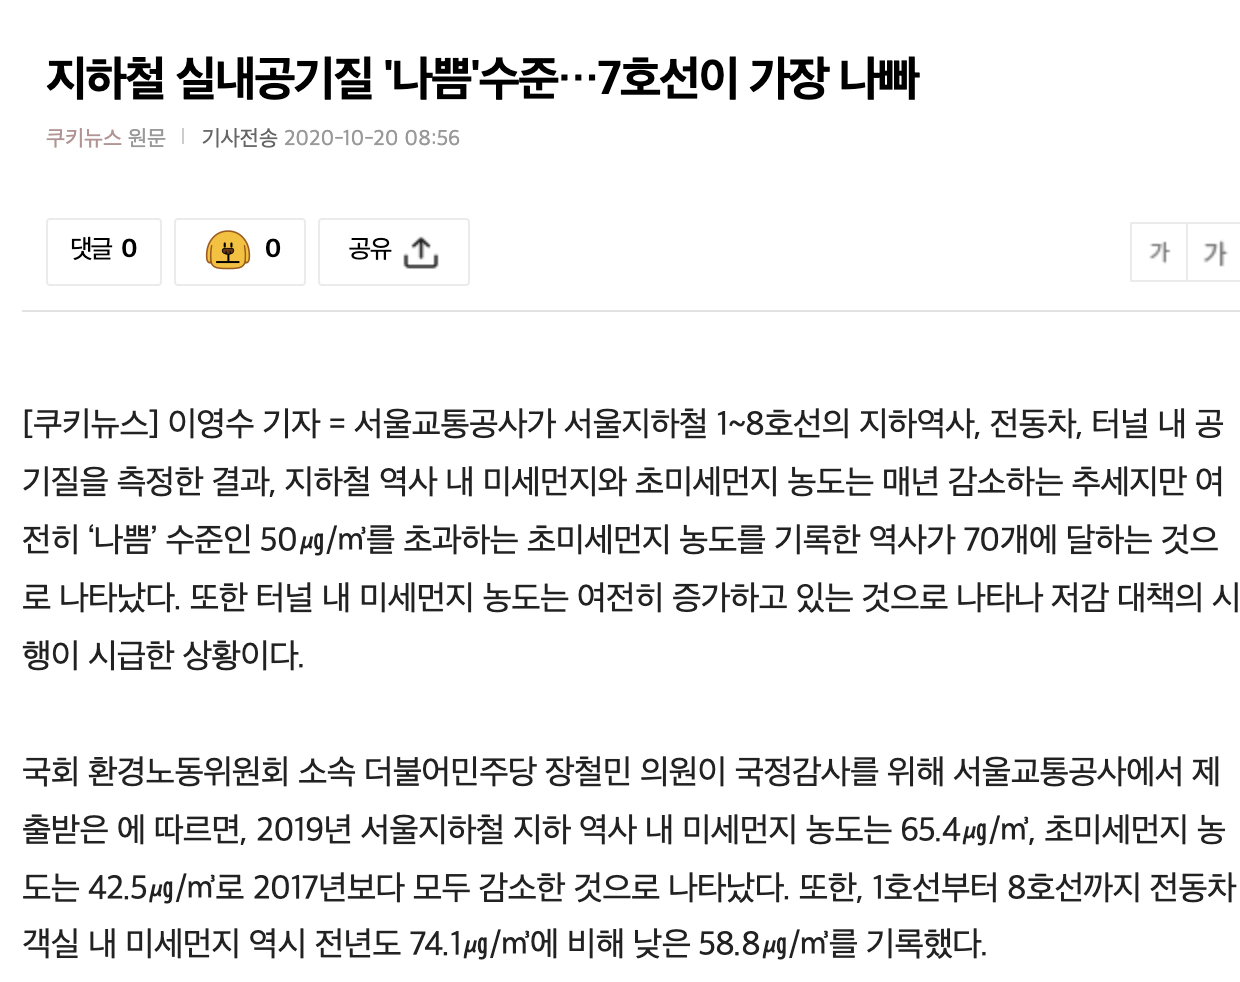  
https://news.nate.com/view/20201020n06193?mid=n1101

In [60]:
# 범례 추가 
def add_categorical_legend(folium_map, title, colors, labels):
    if len(colors) != len(labels):
        raise ValueError("colors and labels must have the same length.")

    color_by_label = dict(zip(labels, colors))
    
    legend_categories = ""     
    for label, color in color_by_label.items():
        legend_categories += f"<li><span style='background:{color}'></span>{label}</li>"
        
    legend_html = f"""
    <div id='maplegend' class='maplegend'>
      <div class='legend-title'>{title}</div>
      <div class='legend-scale'>
        <ul class='legend-labels'>
        {legend_categories}
        </ul>
      </div>
    </div>
    """
    script = f"""
        <script type="text/javascript">
        var oneTimeExecution = (function() {{
                    var executed = false;
                    return function() {{
                        if (!executed) {{
                             var checkExist = setInterval(function() {{
                                       if ((document.getElementsByClassName('leaflet-top leaflet-right').length) || (!executed)) {{
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.display = "flex"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.flexDirection = "column"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].innerHTML += `{legend_html}`;
                                          clearInterval(checkExist);
                                          executed = true;
                                       }}
                                    }}, 100);
                        }}
                    }};
                }})();
        oneTimeExecution()
        </script>
      """
   

    css = """

    <style type='text/css'>
      .maplegend {
        z-index:9999;
        float:right;
        background-color: rgba(255, 255, 255, 1);
        border-radius: 5px;
        border: 2px solid #bbb;
        padding: 10px;
        font-size:12px;
        positon: relative;
      }
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 0px solid #ccc;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    """

    folium_map.get_root().header.add_child(folium.Element(script + css))

    return folium_map

In [61]:
## 지도에 공기질 / 승객수를 시각화 호선별로 확인
import branca.colormap as cm

# 서울 지도
seoul_map = folium.Map(location = [37.55,126.98], zoom_start = 12, titles= 'seoul subway')

line_color = {'1호선':'blue', '2호선':'green', '3호선':'orange', '4호선':'skyblue', '5호선':'purple', '6호선':'brown', '7호선':'olive', '8호선':'pink', '9호선':'beige'}
colormap = cm.LinearColormap(colors=['blue', 'red'], index=[0.0,1.0],vmin=0.0,vmax=1.0)


seoul_map = add_categorical_legend(seoul_map, '호선',
                             colors = [line_color[f"{line}호선"] for line in range(1,9)],
                           labels = [f"{line}호선" for line in range(1,9)])



for name, lat, lng, num, air, train in zip(subway.index, subway.위도, subway.경도, subway.승객수, subway.공기질점수, subway.호선):
    folium.CircleMarker([lat, lng],
                        radius = num*40,
                        color = line_color[train],
                        fill=True,
                        fill_color= colormap(air),
                        fill_opacity=0.7,
                        weight = 3,
                        popup=name).add_to(seoul_map)


seoul_map


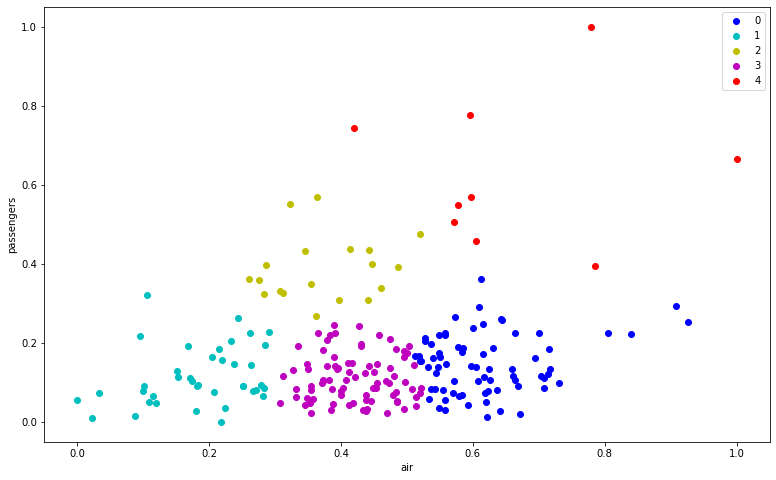

In [62]:
# K Means 클러스터링을 이용하여 역들을 군집화함

from sklearn.cluster import KMeans


air_df = subway.loc[:, ['공기질점수', '승객수']]

model = KMeans(n_clusters = 5)
model.fit(air_df)
labels = model.predict(air_df)

x = air_df.iloc[:, 0]
y = air_df.iloc[:, 1]

colors = ['b', 'c', 'y', 'm', 'r']
for i in range(5):
    plt.scatter(x[labels == i], y[labels == i], color=colors[i], label = i)
plt.xlabel('air')
plt.legend()
plt.ylabel('passengers')
plt.show()



In [63]:
air_df.corr()

,공기질점수,승객수
공기질점수,1.000000,0.211835
승객수,0.211835,1.000000


In [64]:
# 서울 지도
seoul_map = folium.Map(location = [37.55,126.98], zoom_start = 12, titles= 'seoul subway')

line_color = {'1호선':'blue', '2호선':'green', '3호선':'orange', '4호선':'skyblue', '5호선':'purple', '6호선':'brown', '7호선':'olive', '8호선':'pink', '9호선':'beige'}
colormap = cm.LinearColormap(colors=['blue', 'red'], index=[0.0,1.0],vmin=0.0,vmax=1.0)


seoul_map = add_categorical_legend(seoul_map, '호선',
                             colors = [line_color[f"{line}호선"] for line in range(1,9)],
                           labels = [f"{line}호선" for line in range(1,9)])



for name, lat, lng, num, air, train in zip(subway.index, subway.위도, subway.경도, subway.승객수, subway.공기질점수, subway.호선):
    folium.CircleMarker([lat, lng],
                        radius = num*40,
                        color = line_color[train],
                        fill=True,
                        fill_color= colormap(air),
                        fill_opacity=0.7,
                        weight = 3,
                        popup=name).add_to(seoul_map)

#승객수도 많고 공기질도 안좋은 역들을 마커로 표시
subway_label4 = subway[labels == 4]

for line, name, lat, lng, num in zip(subway_label4.호선, subway_label4.역명, subway_label4.위도, subway_label4.경도, subway_label4.승객수):
    folium.Marker([lat, lng],
                  tooltip=line+name).add_to(seoul_map)
    
seoul_map

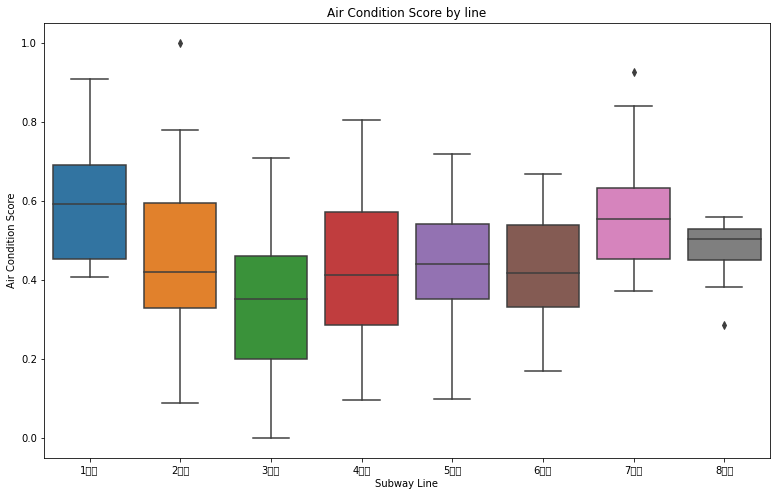

In [65]:
# 호선별 공기질의 상자그림

sns.boxplot(y = '공기질점수', x = '호선', data=merged_df)
plt.title("Air Condition Score by line")
plt.xlabel("Subway Line")
plt.ylabel("Air Condition Score")
plt.show()

In [92]:
line_list = []
for i in range(1, 9):
    line_list.append(subway.공기질점수[subway.호선==f'{i}호선'])
    print(stats.shapiro(line_list[i - 1]))

ShapiroResult(statistic=0.9610351920127869, pvalue=0.8090927600860596)
ShapiroResult(statistic=0.9711592793464661, pvalue=0.5128825902938843)
ShapiroResult(statistic=0.9811083078384399, pvalue=0.8427981734275818)
ShapiroResult(statistic=0.976209819316864, pvalue=0.8899282813072205)
ShapiroResult(statistic=0.9856947660446167, pvalue=0.8010239601135254)
ShapiroResult(statistic=0.9651744961738586, pvalue=0.29314687848091125)
ShapiroResult(statistic=0.9538698792457581, pvalue=0.17243234813213348)
ShapiroResult(statistic=0.8702314496040344, pvalue=0.07805454730987549)


In [93]:
print(stats.levene(*line_list))

LeveneResult(statistic=1.9604904419659974, pvalue=0.06173468463269318)


In [94]:
# One-Way ANova
stats.f_oneway(*line_list) # 일원 분산 분석을 이용한 p-value 


F_onewayResult(statistic=6.556015082696256, pvalue=5.040990601873264e-07)

## 평일과 주말의 승객수의 차이가 있는지 검정

In [97]:
congestion_df.head()

,호선,역명,자치구,역번호,구분,조사일자,7:00,7:30,8:00,8:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,평균혼잡도
0,1호선,서울역,중구,150,상선,weekend,11.15,13.10,21.9,21.75,...,15.90,14.65,14.75,14.15,13.45,16.5,16.8,11.60,10.05,29.222727
1,1호선,서울역,중구,150,상선,weekdays,28.40,46.70,70.0,74.50,...,29.80,21.70,15.10,15.90,17.10,16.0,19.0,15.20,10.50,33.418182
2,1호선,서울역,중구,150,하선,weekend,10.45,7.55,12.6,14.05,...,31.25,27.60,22.70,24.65,28.05,30.6,32.3,21.95,20.00,31.822727
3,1호선,서울역,중구,150,하선,weekdays,17.80,26.40,34.8,25.20,...,51.00,37.40,36.50,31.20,37.60,44.6,45.6,37.80,28.80,38.693939
4,1호선,시청,중구,151,상선,weekend,9.85,11.40,18.6,18.80,...,17.20,15.80,17.10,16.65,15.30,18.2,19.3,14.80,11.90,28.225758


Text(0, 0.5, 'congestion')

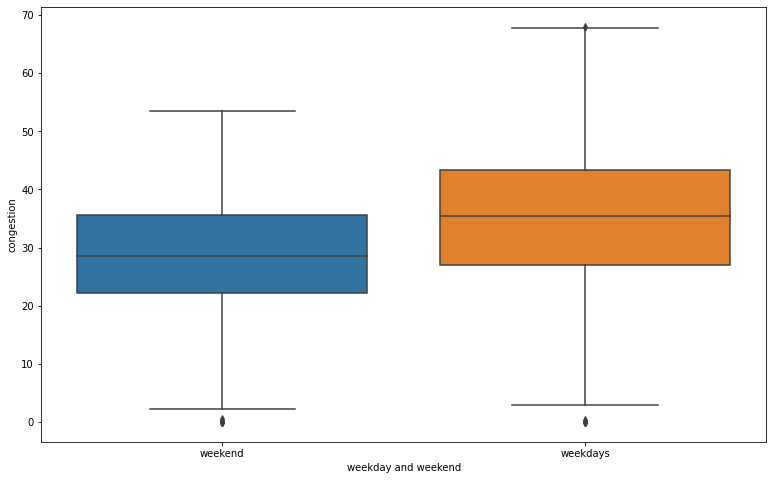

In [70]:
# Boxplot으로 시각화
congestion_df['평균혼잡도'] = congestion_df.loc[:, "7:00":].mean(axis = 1)

congestion_df.조사일자 = congestion_df['조사일자'].apply(lambda x : 'weekdays' if x == '평일' else 'weekend')
sns.boxplot(x = '조사일자', y = '평균혼잡도', data = congestion_df)

plt.xlabel('weekday and weekend')
plt.ylabel("congestion")


In [79]:
filter_idx = congestion_df.조사일자 == 'weekdays'
평일혼잡도 = congestion_df[filter_idx]['평균혼잡도']
주말혼잡도 = congestion_df[~filter_idx]['평균혼잡도']

평일mean = 평일혼잡도.mean()
주말mean = 주말혼잡도.mean()

평일std = 평일혼잡도.std(ddof = 0) #모표준편차
주말std = 주말혼잡도.std(ddof = 0)

In [82]:
# Paired Z Test의 Z 통계량
z_score = (평일mean - 주말mean) / (np.sqrt((평일std / len(평일혼잡도) + 주말std / len(주말혼잡도))))
z_score

31.975737313210182

In [87]:
p_value = stats.norm.cdf(z_score)
p_value

1.0

### 랜덤포레스트로 분류하기

In [141]:
congestion_value = congestion_df.loc[:, "7:00":"22:30"].to_numpy()
congestion_value = pd.DataFrame(congestion_value.reshape(-1, congestion_value.shape[1] * 4))

congestion_flatted = pd.concat(
    [congestion_df.loc[list(range(0, 980, 4)), :"역번호"].reset_index(),congestion_value.reset_index()], axis = 1).drop(['index'], axis = 1)

#혼잡도, 승객수, 공기질이 모두 병합된 데이터프레임
all_merged_df = pd.merge(subway, congestion_flatted, on = ['호선','역명','자치구','역번호'], how = 'inner')
all_merged_df.head()

,호선,역명,자치구,역번호,미세먼지,이산화탄소,포름알데히드,일산화탄소,공기질점수,1월,...,118,119,120,121,122,123,124,125,126,127
0,1호선,시청,중구,151,0.741235,0.572700,0.414110,0.500000,0.700221,1477362.0,...,88.8,73.4,48.1,34.1,32.0,27.7,34.8,39.3,37.4,36.3
1,2호선,시청,중구,201,0.884808,0.418398,0.174847,0.500000,0.600502,1410239.0,...,59.6,53.5,37.0,25.9,23.5,23.0,31.4,38.0,40.0,38.2
2,1호선,종각,종로구,152,0.726210,0.801187,0.496933,0.416667,0.785164,2462560.0,...,74.7,56.5,38.6,26.3,27.8,21.5,28.7,32.2,35.3,27.7
3,1호선,종로3가,종로구,153,0.818030,0.679525,0.500000,0.750000,0.907447,1935106.0,...,54.2,43.9,29.8,20.7,20.0,15.6,18.5,21.4,21.9,19.0
4,3호선,종로3가,종로구,319,0.864775,0.587537,0.294479,0.500000,0.707698,714572.0,...,58.5,50.2,33.9,22.5,18.9,18.2,23.3,22.0,23.3,18.0


In [142]:
X = all_merged_df.loc[:, "역번호":].to_numpy() # featrue
y = all_merged_df.호선.to_numpy()

In [145]:

X = (X - X.mean(axis = 0)) / X.std(axis=0)
X

array([[-1.29409903,  1.44445732,  0.65508718, ...,  0.50498831,
         0.21710341,  0.41764852],
       [-1.25098418,  2.15098658, -0.01717855, ...,  0.43643492,
         0.33579634,  0.52276801],
       [-1.29323673,  1.37051821,  1.65055758, ...,  0.13058133,
         0.12123605, -0.05815551],
       ...,
       [ 1.00650922, -0.37115857,  1.50834752, ...,  1.03232209,
         0.96578186,  1.09262632],
       [ 1.00737151, -1.34879789,  0.34481069, ...,  0.6842818 ,
         0.52296595,  0.8491917 ],
       [ 1.00823381, -0.25614218,  0.88779454, ..., -0.06980551,
        -0.1161498 ,  0.16868129]])

### Conclusion and Summary

... 

### References

- https://www.kaggle.com/austinreese/craigslist-carstrucks-data
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://stackoverflow.com/questions/65042654/how-to-add-categorical-legend-to-python-folium-map